In [ ]:
from re import X
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive

## NAMES OF CSV FILES:
## - Tucson_Police_Reported_Crimes.csv
## - Tucson_Police_Arrests_-_2021_-_Open_Data.csv
## - Neighborhood_Income.csv
## - Neighborhood_Population_Statistics.csv

## DATEFRAMES
report_file = 'https://raw.githubusercontent.com/JoyD-0303/csvFiles/refs/heads/main/Tucson_Police_Reported_Crimes.csv'
reported_crimes_data = pd.read_csv(report_file)
reported_crimes_df = pd.DataFrame(reported_crimes_data)

pa_file = 'https://raw.githubusercontent.com/JoyD-0303/csvFiles/refs/heads/main/Tucson_Police_Arrests_-_2021_-_Open_Data.csv'
arrests_data = pd.read_csv(pa_file)
arrests_df = pd.DataFrame(arrests_data)

neighbor_income_file = 'https://raw.githubusercontent.com/JoyD-0303/csvFiles/refs/heads/main/Neighborhood_Income.csv'
neighbor_income_data = pd.read_csv(neighbor_income_file)
neighbor_income_df = pd.DataFrame(neighbor_income_data)

neighbor_population_file = 'https://raw.githubusercontent.com/JoyD-0303/csvFiles/refs/heads/main/Neighborhood_Population_Statistics.csv'
neighbor_population_data = pd.read_csv(neighbor_population_file)
neighbor_population_df = pd.DataFrame(neighbor_population_data)

In [ ]:
## ============================================= Claire's Space =============================================
## Determining HouseHold Median Income in each Ward
ward1 = np.array([])
ward2 = np.array([])
ward3 = np.array([])
ward4 = np.array([])
ward5 = np.array([])
ward6 = np.array([])

## Separate data by wards
for index, row in neighbor_income_df.iterrows():
  if row['WARD'] == 1:
    ward1 = np.append(ward1, row['MEDHINC_CY'])
  elif row['WARD'] == 2:
    ward2 = np.append(ward2, row['MEDHINC_CY'])
  elif row['WARD'] == 3:
    ward3 = np.append(ward3, row['MEDHINC_CY'])
  elif row['WARD'] == 4:
    ward4 = np.append(ward4, row['MEDHINC_CY'])
  elif row['WARD'] == 5:
    ward5 = np.append(ward5, row['MEDHINC_CY'])
  elif row['WARD'] == 6:
    ward6 = np.append(ward6, row['MEDHINC_CY'])

## Find the median of each ward and round it to two decimal places
ward_median_income_num = [np.median(ward1), np.median(ward2), np.median(ward3), np.median(ward4), np.median(ward5), np.median(ward6)]
ward_median_income_num = np.round_(ward_median_income_num, 2)

## Determining types of crime and their occurences in each ward
wards = sorted(reported_crimes_df['Ward'].unique())
homicide = np.array([0, 0, 0, 0, 0, 0])
SA = np.array([0, 0, 0, 0, 0, 0])
Robbery = np.array([0, 0, 0, 0, 0, 0])
assault = np.array([0, 0, 0, 0, 0, 0])
burglary = np.array([0, 0, 0, 0, 0, 0])
larceny = np.array([0, 0, 0, 0, 0, 0])
gta = np.array([0, 0, 0, 0, 0, 0])
arson = np.array([0, 0, 0, 0, 0, 0])
total = np.array([0, 0, 0, 0, 0, 0])

## Count the occurences of each category of crime
for i in range(len(wards)):
 df = pd.DataFrame(reported_crimes_data)
 ward = wards[i]
 df = df[df['Ward'] == ward]
 for index, row in df.iterrows():
   total[i] += 1
   if row['UCRDescription'] == '01 - HOMICIDE':
     homicide[i] += 1
   elif row['UCRDescription'] == '02 - SEXUAL ASSAULT':
     SA[i] += 1
   elif row['UCRDescription'] == '03 - ROBBERY':
     Robbery[i] += 1
   elif row['UCRDescription'] == '04 - ASSAULT, AGGRAVATED':
     assault[i] += 1
   elif row['UCRDescription'] == '05 - BURGLARY':
     burglary[i] += 1
   elif row['UCRDescription'] == '06 - LARCENY':
     larceny[i] += 1
   elif row['UCRDescription'] == '07 - GTA':
     gta[i] += 1
   elif row['UCRDescription'] == '08 - ARSON':
     arson[i] += 1

,Ward,Median_Income,Homicide,SA,Robbery,Assault,Burglary,Larceny,GTA,Arson,All
2,3,33635.0,87,574,1589,3094,4301,29202,3355,323,42525
4,5,35285.0,95,457,1249,2780,2605,18599,2956,237,28978
0,1,36502.5,81,383,1103,2241,2121,22748,2615,184,31476
5,6,45094.0,61,585,1309,2640,4094,27559,2762,226,39236
3,4,56677.5,36,312,559,1405,1518,7553,1213,74,12670
1,2,59773.0,30,413,655,1334,1991,16654,1724,95,22896


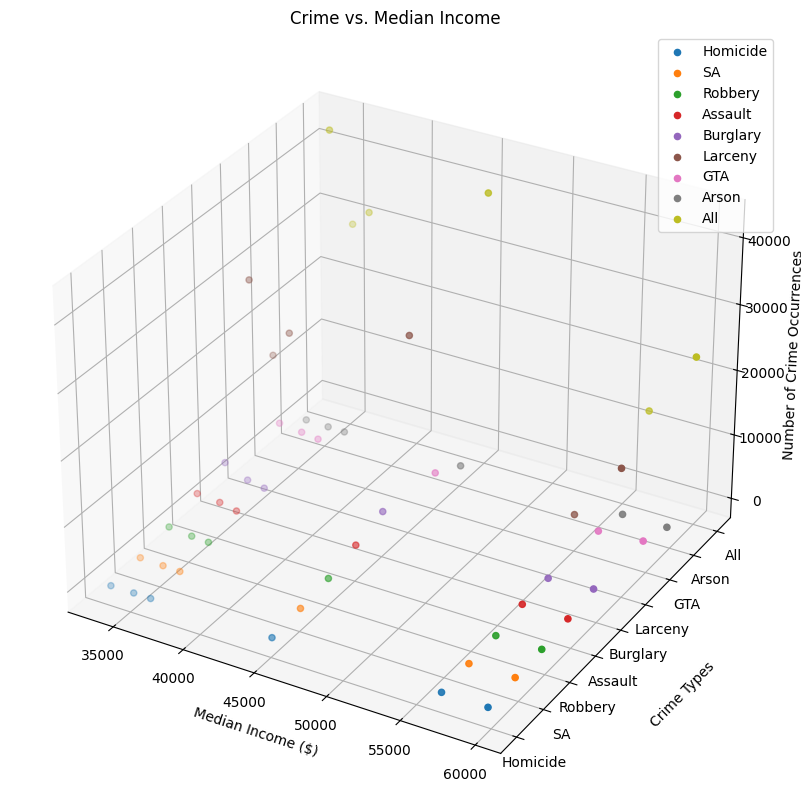

In [ ]:
## Create a new DataFrame that contains the each Ward and its Median Income along
## with its number of reports for each crime category
ward_num = np.array([1, 2, 3, 4, 5, 6])
crime_income_data = {'Ward': ward_num, 'Median_Income': ward_median_income_num, 'Homicide': homicide, 'SA': SA, 'Robbery': Robbery,
                     'Assault': assault, 'Burglary': burglary, 'Larceny': larceny, 'GTA': gta, 'Arson': arson, 'All' : total}
crime_income_data = pd.DataFrame(crime_income_data)
crime_income_data = crime_income_data.sort_values(by = 'Median_Income')
display(crime_income_data)

## Create the 3D scatterplot
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")

## Individually plot the crime data for each median income level
ax.scatter(crime_income_data['Median_Income'], 0, crime_income_data['Homicide'])
ax.scatter(crime_income_data['Median_Income'], 1, crime_income_data['SA'])
ax.scatter(crime_income_data['Median_Income'], 2, crime_income_data['Robbery'])
ax.scatter(crime_income_data['Median_Income'], 3, crime_income_data['Assault'])
ax.scatter(crime_income_data['Median_Income'], 4, crime_income_data['Burglary'])
ax.scatter(crime_income_data['Median_Income'], 5, crime_income_data['Larceny'])
ax.scatter(crime_income_data['Median_Income'], 6, crime_income_data['GTA'])
ax.scatter(crime_income_data['Median_Income'], 7, crime_income_data['Arson'])
ax.scatter(crime_income_data['Median_Income'], 8, crime_income_data['All'])

crime_types = np.array(['Homicide', 'SA', 'Robbery', 'Assault', 'Burglary', 'Larceny', 'GTA', 'Arson', 'All'])

## Add in title, labels, and the legend to the scatterplot
plt.yticks(ticks=np.arange(9), labels=crime_types)
ax.set_xlabel('Median Income ($)', labelpad = 5)
ax.set_ylabel('Crime Types', labelpad=20)
ax.set_zlabel('Number of Crime Occurrences')
ax.set_title('Crime vs. Median Income')
plt.legend(['Homicide', 'SA', 'Robbery', 'Assault', 'Burglary', 'Larceny', 'GTA', 'Arson', 'All'])
plt.show()

,Ward,Median_Income,Homicide,SA,Robbery,Assault,Burglary,Larceny,GTA,Arson,All
2,3,33635.0,87,574,1589,3094,4301,29202,3355,323,42525
4,5,35285.0,95,457,1249,2780,2605,18599,2956,237,28978
0,1,36502.5,81,383,1103,2241,2121,22748,2615,184,31476
5,6,45094.0,61,585,1309,2640,4094,27559,2762,226,39236
3,4,56677.5,36,312,559,1405,1518,7553,1213,74,12670
1,2,59773.0,30,413,655,1334,1991,16654,1724,95,22896


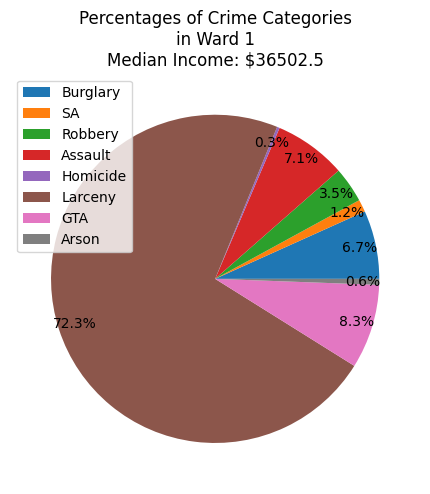

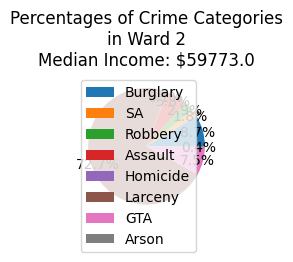

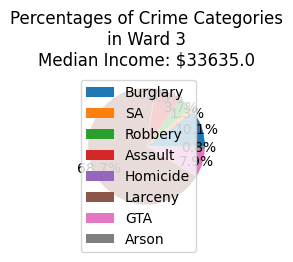

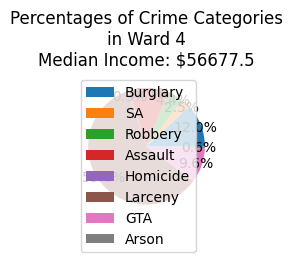

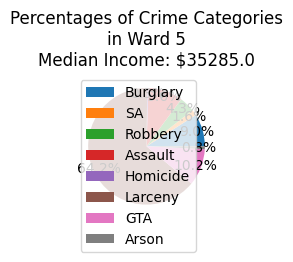

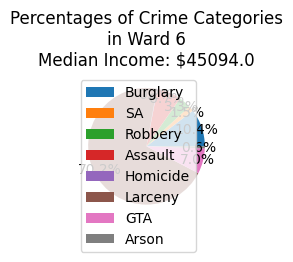

In [ ]:
## Find the percentages each type of crime takes up in the overall reported crimes
## of each ward

## Remove the columns that aren't names of crime categories
crime_data = crime_income_data
display(crime_data)
crime_data.drop(columns=['Ward','Median_Income','All'])

## Get a numpy array of just the names of crime categories (remove 'All')
crime_names = np.delete(crime_types, [8])

## Swap the position of Homicide to avoid overlapping info on the pie chart
crime_names[0] = 'Burglary'
crime_names[4] = 'Homicide'

reports = np.array([0,0,0,0,0,0,0,0])

plt.figure(figsize=(18, 12))

## Create a pie chart for each ward
for i in range(6):
  j = 0
  for category in crime_names:
    reports[j]= crime_data.loc[i, category]
    j+=1
  med_income = crime_income_data.loc[i, 'Median_Income']
  plt.subplot(2,3,i+1)
  plt.pie(reports, pctdistance = 0.9,autopct='%1.1f%%')
  plt.legend(crime_names, loc = 'upper left')
  plt.title("Percentages of Crime Categories\nin Ward " + str(crime_income_data.loc[i,'Ward'])+ "\nMedian Income: $"+str(med_income))
  plt.show()

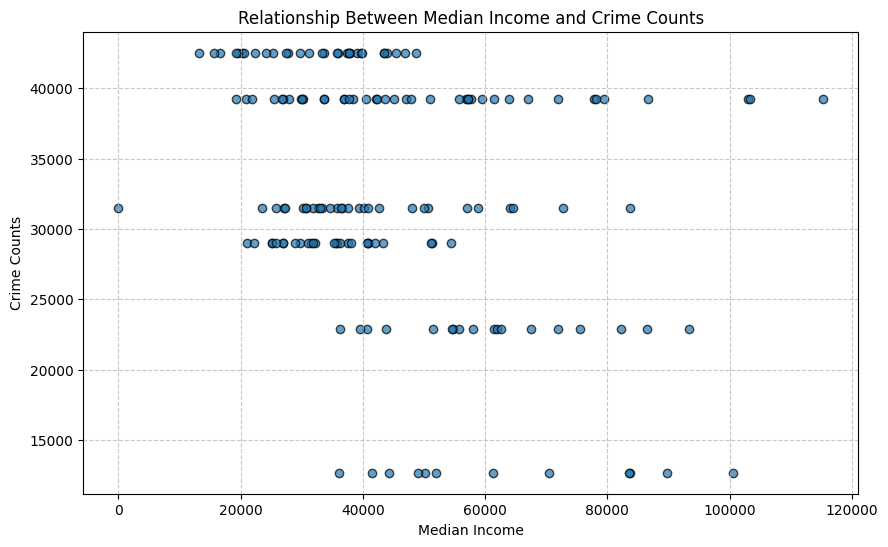

In [ ]:
## ============================================= Louis's Space =============================================

## Ensure consistent ward formatting
reported_crimes_df['Ward'] = pd.to_numeric(reported_crimes_df['Ward'], errors='coerce').dropna().astype(int)
neighbor_income_df['WARD'] = pd.to_numeric(neighbor_income_df['WARD'], errors='coerce').dropna().astype(int)

## Aggregate Crime Data
crime_counts_by_ward = reported_crimes_df.groupby('Ward').size().reset_index(name='Crime_Counts')

## Merge Crime Counts with Income Data
income_data = neighbor_income_df[['WARD', 'MEDHINC_CY']].rename(columns={'WARD': 'Ward', 'MEDHINC_CY': 'Median_Income'})
merged_data = pd.merge(crime_counts_by_ward, income_data, on='Ward', how='inner')

## Visualize the Data
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Median_Income'], merged_data['Crime_Counts'], alpha=0.7, edgecolors='k')
plt.title('Relationship Between Median Income and Crime Counts')
plt.xlabel('Median Income')
plt.ylabel('Crime Counts')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
## Display merged data for debugging
print("Merged DataFrame:")
print(merged_data)

Merged DataFrame:
     Ward  Crime_Counts  Median_Income
0     1.0         31476          39293
1     1.0         31476          40183
2     1.0         31476          32736
3     1.0         31476          25821
4     1.0         31476          31883
..    ...           ...            ...
154   6.0         39236         103357
155   6.0         39236          57261
156   6.0         39236          37684
157   6.0         39236          29991
158   6.0         39236          43696

[159 rows x 3 columns]


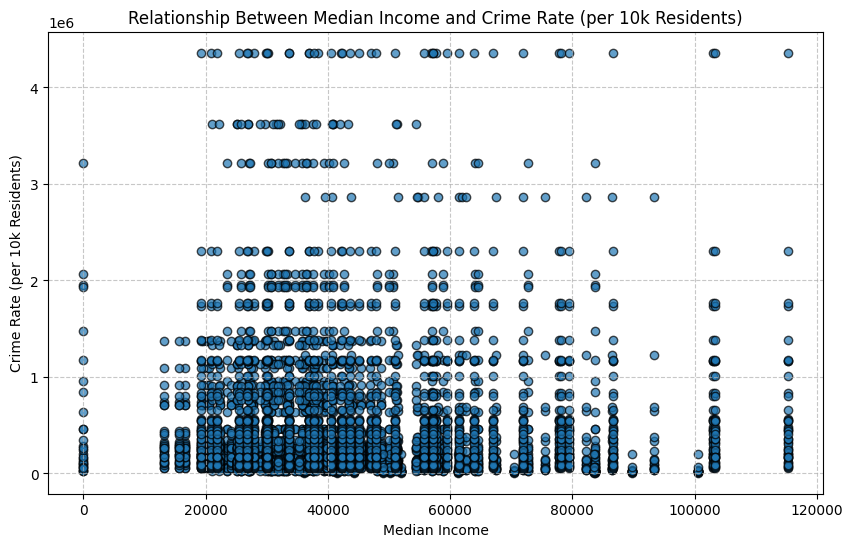

In [ ]:
## Clean and merge population data
neighbor_population_df['WARD'] = pd.to_numeric(neighbor_population_df['WARD'], errors='coerce').dropna().astype(int)
population_data = neighbor_population_df[['WARD', 'TOTPOP']].rename(columns={'WARD': 'Ward', 'TOTPOP': 'Population'})

## Merge with crime-income data
merged_data = pd.merge(merged_data, population_data, on='Ward', how='inner')

## Calculate Crime Rate per 10,000 Residents
merged_data['Crime_Rate_Per_10k'] = (merged_data['Crime_Counts'] / merged_data['Population']) * 10000

## Visualization - Median Income vs Crime Rate (per 10,000 Residents)
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Median_Income'], merged_data['Crime_Rate_Per_10k'], alpha=0.7, edgecolors='k')
plt.title('Relationship Between Median Income and Crime Rate (per 10k Residents)')
plt.xlabel('Median Income')
plt.ylabel('Crime Rate (per 10k Residents)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

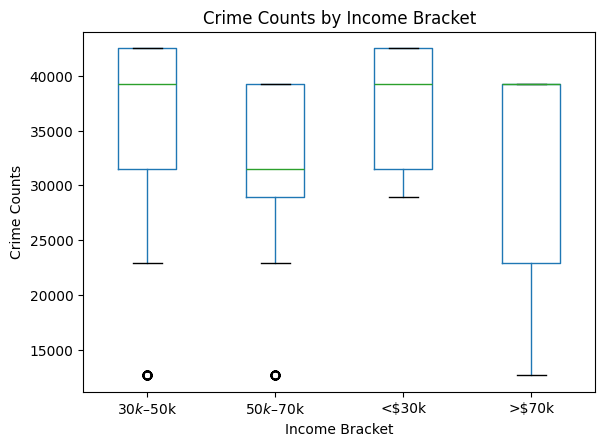

In [ ]:
## Categorize Wards into Income Brackets
def income_bracket(income):
   if income < 30000:
       return '<$30k'
   elif 30000 <= income < 50000:
       return '$30k–$50k'
   elif 50000 <= income < 70000:
       return '$50k–$70k'
   else:
       return '>$70k'

merged_data['Income_Bracket'] = merged_data['Median_Income'].apply(income_bracket)

## Box Plot of Crime Counts by Income Bracket
plt.figure(figsize=(10, 6))
merged_data.boxplot(column='Crime_Counts', by='Income_Bracket', grid=False)
plt.title('Crime Counts by Income Bracket')
plt.suptitle('')  # Remove default subtitle
plt.xlabel('Income Bracket')
plt.ylabel('Crime Counts')
plt.show()

In [ ]:
## ============================================= Joyce's Space =============================================

##-----------------------Correlation/Calculations-----------------------##
## Linear and Logistic Regression to predict occrence of crime          ##
## Use pearsonr method of determining correlation numbers               ##
## Using reported arrests + neighborhood population                     ##
##----------------------------------------------------------------------##

## Data Cleaning/Merging
neighbor_income_df.sort_values(by = 'NAME')
neighbor_income_df = neighbor_income_df.drop(neighbor_income_df[neighbor_income_df['NAME'] == "Sombras Del Cerro"].index)
neighbor_income_df = neighbor_income_df.drop(neighbor_income_df[neighbor_income_df['NAME'] == "Catalina Vista/Blenman-Elm"].index)
neighbor_income_df = neighbor_income_df.drop(neighbor_income_df[neighbor_income_df['NAME'] == "Downtown"].index)
neighbors = list(neighbor_income_df['NAME'])
income_neighbors = list(neighbor_income_df['MEDHINC_CY'])
neighbor_population_df.sort_values(by = 'NAME')
neighbor_population_df = neighbor_population_df.drop(neighbor_population_df[neighbor_population_df['NAME'] == "Sombras Del Cerro"].index)
neighbor_population_df = neighbor_population_df.drop(neighbor_population_df[neighbor_population_df['NAME'] == "Catalina Vista/Blenman-Elm"].index)
neighbor_population_df = neighbor_population_df.drop(neighbor_population_df[neighbor_population_df['NAME'] == "Downtown"].index)
neighbor_pop = np.array(list(neighbor_population_df['TOTPOP']))
crime_occurences = np.zeros(len(neighbors))
np.set_printoptions(suppress=True)

for index, row in arrests_df.iterrows():
  for i in np.arange(len(neighbors)):
    if row['NHA_NAME'] == neighbors[i]:
      crime_occurences[i] += 1
      break

crime_occurences = np.multiply(np.divide(crime_occurences, neighbor_pop), 100000)
crime_occurences_mean = np.mean(crime_occurences)
crime_occurences_mean_log = np.log(crime_occurences_mean)

## Merged Data
arrests_income_data = {'Neighborhood': neighbors, 'Median_Income': income_neighbors, 'Crime_Rate': np.log(crime_occurences)}
arrests_income_df = pd.DataFrame(arrests_income_data)


In [ ]:
## Classify data for Logistic Regression
high_low_crime_df = arrests_income_df.copy()
for index, row in high_low_crime_df.iterrows():
  if row['Crime_Rate'] >= crime_occurences_mean_log:
    high_low_crime_df.at[index, 'Crime_Rate'] = 1
  else:
    high_low_crime_df.at[index, 'Crime_Rate'] = 0

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = high_low_crime_df[['Median_Income']]
y = high_low_crime_df['Crime_Rate']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'log(crime_rate): {crime_occurences_mean_log}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


log(crime_rate): 9.021566809191127
Accuracy: 0.78125
Precision: 0.7
Recall: 0.6363636363636364


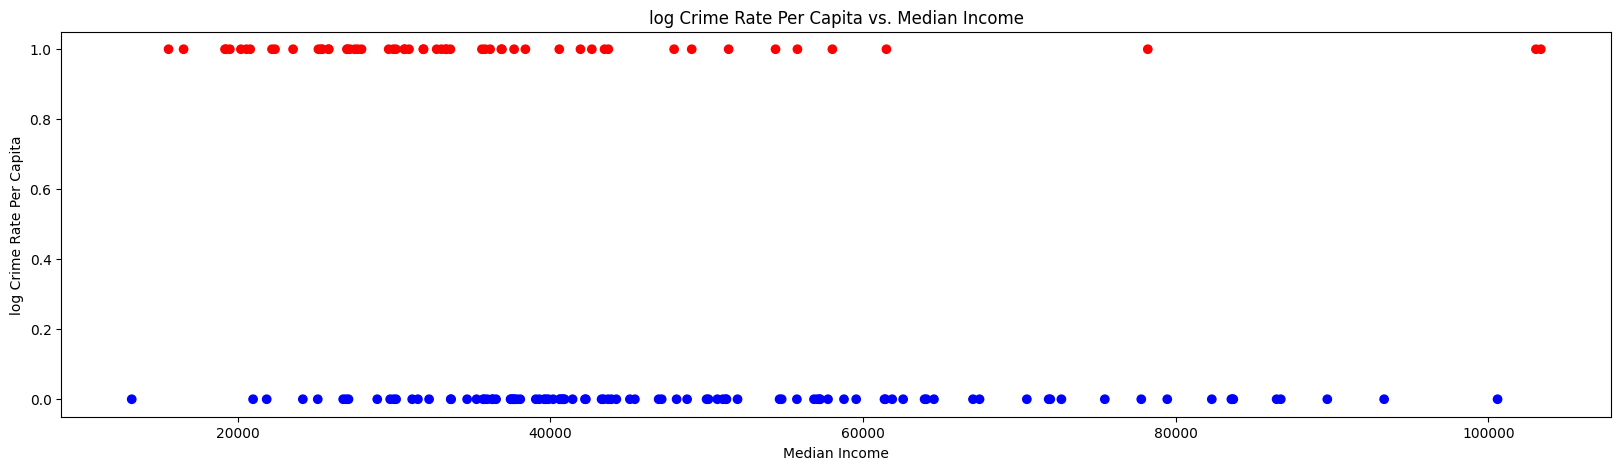

In [ ]:
## Visual for Logistic Regression
colors = ['blue' if val == 0 else 'red' for val in y]
plt.figure(figsize = (20, 5))
plt.scatter(high_low_crime_df['Median_Income'], high_low_crime_df['Crime_Rate'], color = colors)
plt.xlabel("Median Income")
plt.ylabel("log Crime Rate Per Capita")
plt.title("log Crime Rate Per Capita vs. Median Income")
plt.show()

In [ ]:
## Results for Linear Regression Model + Pearsonr's Correlation
correlation, p_value = stats.pearsonr(arrests_income_df['Median_Income'], arrests_income_df['Crime_Rate'])
print(f'Correlation: {correlation}, P-value: {p_value}')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = arrests_income_df[['Median_Income']]
y = arrests_income_df['Crime_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Correlation: -0.506569321617064, P-value: 1.508988770453997e-11
Mean Squared Error: 0.43723435154843954
R-squared: 0.35243619597556397


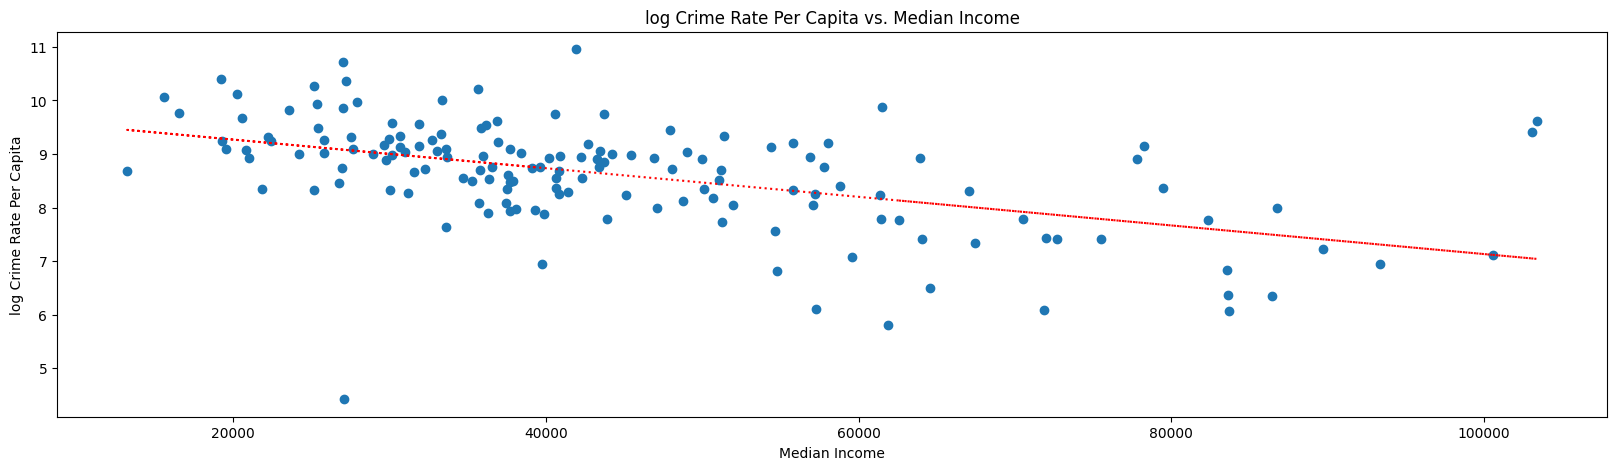

In [ ]:
## Visual for Linear Regression
plt.figure(figsize = (20, 5))
plt.scatter(arrests_income_df['Median_Income'], arrests_income_df['Crime_Rate'])
m, b = np.polyfit(arrests_income_df['Median_Income'], arrests_income_df['Crime_Rate'], 1)
plt.plot(arrests_income_df['Median_Income'], m*arrests_income_df['Median_Income'] + b, color = 'red', linestyle = "dotted")
plt.xlabel("Median Income")
plt.ylabel("log Crime Rate Per Capita")
plt.title("log Crime Rate Per Capita vs. Median Income")
plt.show()